# IEDA 3302 Project
### By: Amodh Mathur, Malhaar Vora, Cristal Celeste

## Introduction & Project Objective
In recent years, online shopping has become a huge market. Especially when it comes to shopping for clothing, which makes up a significant part of E-commerce traffic. We would like to know if clothing sales depend not only on price but also on external factors such as the weather. Our focus will be on the correlation between weather and sales - specifically winter. We believe there is a correlation between people buying winter clothing as the temperature in Hong Kong drops.

We have decided to use HKTV mall, the biggest 24 hour online shopping mall to access purchasing and traffic data for the years of 2015-2022. As well as the Hong Kong Observatory to provide us with the weather trends for those same years.

NOTE: The name in 'brackets' eg . (name) is the person majorly responsible for writing that subtask ALTHOUGH ALL 3 MEMBERS have had suggestions and inputs into the analysis conducted.

### The following code is used to import the various libraries used for the analysis (Malhaar)

In [1]:
import pandas as pd
import requests
import json
import ujson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import sympy as sy

#### No expected output...

### The following tasks uses an array called 'Categories' which are the product categories for various clothing types, and then using the data obtained from the HKTVMALL API (see the 'htkvmall_data_collection' notebook), we combine the data from various categories and store as one dataframe (and in 1 csv output for easy use later). This is obtained using the HKTV MALL databank (Malhaar)

In [2]:
categories = ["AA22106000001","AA22151000001","AA22152000001","AA22153000001","AA22154000001","AA22155000001","AA22156000001","AA26104000001","AA26151000001","AA26152000001","AA26153000001","AA26154000001","AA26155000001"]

In [3]:
for i in range ( len(categories)):
    categories[i] ="data/" + categories[i] + ".csv"
    
#combined_csv = pd.concat([pd.read_csv(f) for f in categories])
#combined_csv.to_csv( "data/combined_hktvmalldata.csv", index=False)
combined_csv=pd.read_csv('combined_hktvmalldata.csv')
combined_csv

,Unnamed: 0,order_date,order_time_range,delivery_date,delivery_timeslot,app_type,device_type,area,district,delivery_district,housing_type,quantity,total_price,primary_category,primary_category_name_en,clothing_category,Date
0,0,11/16/2022,00-09,11/19/2022,14:00 - 18:00,MAIN,Android,NT,TUEN MUN TAI LAM NT,NT-TM,Private,1,100 - 200,AA22106000001,Women's Fashion,Knitwear & Sweater,NaN
1,1,11/15/2022,00-09,11/16/2022,10:00 - 14:00,MAIN,iOS,NT,LAI KING NT,WTX,Commercial,1,300 - 400,AA22106000001,Women's Fashion,Knitwear & Sweater,NaN
2,2,11/15/2022,00-09,11/16/2022,10:00 - 14:00,MAIN,iOS,NT,LAI KING NT,WTX,Commercial,1,300 - 400,AA22106000001,Women's Fashion,Knitwear & Sweater,NaN
3,3,11/15/2022,21-24,11/18/2022,18:00 - 21:00,MAIN,Android,KLN,HO MAN TIN KLN,WTK,HOS,1,200 - 300,AA22106000001,Women's Fashion,Knitwear & Sweater,NaN
4,4,11/15/2022,9-Dec,11/16/2022,18:00 - 21:00,MAIN,iOS,NT,MA ON SHAN NT,NT-TSM,HOS,1,100 - 200,AA22106000001,Women's Fashion,Knitwear & Sweater,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83979,2835,12/26/2015,15-18,12/30/2015,19:00 - 23:00,MAIN,NaN,NaN,NaN,NaN,NaN,1,600 - 700,AA26155000001,Men's Fashion,Down Wear,17.9
83980,2836,12/19/2015,9-Dec,NaN,NaN,MAIN,NaN,NaN,NaN,NaN,NaN,1,200 - 300,AA26155000001,Men's Fashion,Down Wear,16.2
83981,2837,12/17/2015,15-18,12/20/2015,10:00 - 14:00,MAIN,NaN,NaN,NaN,NaN,NaN,1,600 - 700,AA26155000001,Men's Fashion,Down Wear,13.2
83982,2838,11/12/2015,Dec-15,NaN,NaN,MAIN,NaN,NaN,NaN,NaN,NaN,1,300 - 400,AA26155000001,Men's Fashion,Down Wear,23.9


#### We obtained the HTKV MALL data and have observed that there is alot of data , which may need cleanup to understand properly

### The following cleanup allows us to use the category mapping (obtained from HKTV mall) to truncate some un-needed columns and make the data better to understand. (Malhaar)  

In [4]:
cleaned_data = combined_csv[['order_date', 'quantity', 'total_price', 'primary_category']]
#dictionary for primary_category
primary_category = {
    "AA22106000001": "Knitwear & Sweater",
    "AA22151000001": "Short Cut",
    "AA22152000001": "Long Cut",
    "AA22153000001": "Blazers",
    "AA22154000001": "Windbreakers",
    "AA22155000001": "Down Wear",
    "AA22156000001": "Fur",
    "AA26104000001": "Knitwear",
    "AA26151000001": "Short Cut",
    "AA26152000001": "Long Cut",
    "AA26153000001": "Suits",
    "AA26154000001": "Windbreakers",
    "AA26155000001": "Down Wear"
}
cleaned_data['clothing_category'] = cleaned_data['primary_category'].map(primary_category)
cleaned_data.drop('primary_category', axis=1, inplace=True)
cleaned_data[['Year','Month','Day']] = cleaned_data['order_date'].str.split('/',expand=True)
cleaned_data['Day'] = pd.to_numeric(cleaned_data['Day'])
cleaned_data['Day'] = (cleaned_data['Day']).astype(str)
cleaned_data['Month'] = pd.to_numeric(cleaned_data['Month'])
cleaned_data['Month'] = (cleaned_data['Month']).astype(str)
cleaned_data['Date'] = cleaned_data['Year'] + '-' + cleaned_data['Month'] + '-' + cleaned_data['Day']
cleaned_data.drop('order_date', axis=1, inplace=True)
cleaned_data

<ipython-input-4-7db817a23b2c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['clothing_category'] = cleaned_data['primary_category'].map(primary_category)
C:\Users\amodh\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\amodh\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,quantity,total_price,clothing_category,Year,Month,Day,Date
0,1,100 - 200,Knitwear & Sweater,11,16,2022,11-16-2022
1,1,300 - 400,Knitwear & Sweater,11,15,2022,11-15-2022
2,1,300 - 400,Knitwear & Sweater,11,15,2022,11-15-2022
3,1,200 - 300,Knitwear & Sweater,11,15,2022,11-15-2022
4,1,100 - 200,Knitwear & Sweater,11,15,2022,11-15-2022
...,...,...,...,...,...,...,...
83979,1,600 - 700,Down Wear,12,26,2015,12-26-2015
83980,1,200 - 300,Down Wear,12,19,2015,12-19-2015
83981,1,600 - 700,Down Wear,12,17,2015,12-17-2015
83982,1,300 - 400,Down Wear,11,12,2015,11-12-2015


The output is as expected. As you can see we also split the Year, Month and Day...something that will help us at a later stage when grouping data.

### Obtain the data from HKO using the HKO open data API and doing some cleanup / formatting to make the analysis easier (Amodh)

In [5]:
url = "https://data.weather.gov.hk/weatherAPI/opendata/opendata.php"

years=['2016','2017','2018','2019','2020','2021','2022']

def get_temp(k):
    headers = {
    'dataType':'CLMTEMP',
      'rformat':'csv',
      'station':'HKO'
     ,'year':k
     }
    response= requests.request(method="GET" ,url=url, params=headers)
    return response.text
L=[]
L=get_temp('2015').split('\n')
df=pd.DataFrame(L[3:-4])
df[['Year','Month','Day','Temp','Unit']]=df[0].str.split(',',expand=True)
df=df[['Year','Month','Day','Temp']]
for i in years:
    L=get_temp(i).split('\n')
    df1=pd.DataFrame(L[3:-4])
    df1[['Year','Month','Day','Temp','Unit']]=df1[0].str.split(',',expand=True)
    df1=df1[['Year','Month','Day','Temp']]
    df=df.append(df1)
weather_data = df
weather_data['Date']=weather_data['Month']+'-'+weather_data['Day']+'-'+weather_data['Year']
weather_data=weather_data[['Date','Temp']]
years.insert(0,'2015') # insert 2015 into the list of years
weather_data

,Date,Temp
0,1-1-2015,16.0
1,1-2-2015,15.2
2,1-3-2015,15.5
3,1-4-2015,17.3
4,1-5-2015,19.0
...,...,...
360,12-27-2022,16.9
361,12-28-2022,17.7
362,12-29-2022,16.8
363,12-30-2022,15.0


#### Output as expected with the data being easy to use later. You can see the temperature for each day from 2015 to end of last month (in HK)

### This is where we merge the data to view the temperature and purchase data alongside each other (Amodh / Malhaar)

In [6]:
##merging temp and order data
merged_data=pd.merge(cleaned_data,weather_data,how='left',on='Date')
merged_data=merged_data[['Date','quantity','Temp','clothing_category','total_price']]
merged_data['quantity']=merged_data['quantity'].fillna(1)
merged_data['clothing_category']=merged_data['clothing_category'].fillna('blank')
merged_data['Temp']=pd.to_numeric(merged_data['Temp'])
merged_data['clothing_category']=merged_data['clothing_category'].astype(str)
merged_data[['Month', 'Day','Year']]=merged_data['Date'].str.split('-',expand=True)
merged_data[['p_low','p_high']]=merged_data['total_price'].str.split('-',expand=True)
merged_data=merged_data[['Year','Month','Day','quantity','Temp','quantity','clothing_category','p_low','p_high']]
merged_data['p_low']=pd.to_numeric(merged_data['p_low'])
merged_data['p_high']=pd.to_numeric(merged_data['p_high'])
categories=merged_data.iloc[:,-3].unique()
categories=categories.tolist()
print('merged_data')
merged_data

merged_data


,Year,Month,Day,quantity,Temp,quantity,clothing_category,p_low,p_high
0,2022,11,16,1,24.1,1,Knitwear & Sweater,100,200.0
1,2022,11,15,1,24.3,1,Knitwear & Sweater,300,400.0
2,2022,11,15,1,24.3,1,Knitwear & Sweater,300,400.0
3,2022,11,15,1,24.3,1,Knitwear & Sweater,200,300.0
4,2022,11,15,1,24.3,1,Knitwear & Sweater,100,200.0
...,...,...,...,...,...,...,...,...,...
83979,2015,12,26,1,17.9,1,Down Wear,600,700.0
83980,2015,12,19,1,16.2,1,Down Wear,200,300.0
83981,2015,12,17,1,13.2,1,Down Wear,600,700.0
83982,2015,11,12,1,23.9,1,Down Wear,300,400.0


#### As you can see we can now see the temperature (when available) for all the 83900+ purchases.

### Our first group by where we group to see the number of occurences for each temperature (used later) (Amodh)

In [7]:
##Temp data
temp=merged_data.groupby(['Temp']).agg('sum')
temp=temp.iloc[:,:1]
temp=temp[temp.quantity != 0]
temp=temp.reset_index()
temp

,Temp,quantity
0,4.9,39
1,7.4,24
2,8.5,101
3,8.8,25
4,9.0,116
...,...,...
210,31.5,14
211,31.7,33
212,31.8,5
213,32.0,12


#### Output as expected with alot of cold days :)

### We can now break down the number of sales per month per year (Amodh). AND break it down even further to view it in each category.

In [8]:
##monthly data
name={}
for i in years:
    month=merged_data[merged_data['Year']==i][['Month','Day','quantity']].groupby(['Month']).agg('sum')
    month=month.reset_index()
    month['Month']=pd.to_numeric(month['Month'])
    name[i]=(month.iloc[:,0:2])
name


{'2015':     Month  quantity
 0       1        79
 1      10       534
 2      11      1281
 3      12      1396
 4       2        44
 5       3        66
 6       4        53
 7       5        27
 8       6        34
 9       7        24
 10      8       129
 11      9       328,
 '2016':     Month  quantity
 0       1       977
 1      10      1377
 2      11      2327
 3      12      1863
 4       2       536
 5       3       966
 6       4       588
 7       5       239
 8       6       192
 9       7       300
 10      8       385
 11      9       737,
 '2017':     Month  quantity
 0       1      1153
 1      10      1610
 2      11      2286
 3      12      2632
 4       2       933
 5       3      1037
 6       4       746
 7       5       601
 8       6       472
 9       7       395
 10      8       256
 11      9       571,
 '2018':     Month  quantity
 0       1      1658
 1      10       786
 2      11       980
 3      12      1156
 4       2      1810
 5       3      1097

In [9]:
##Categorized data
cat_yearly={}
for i in categories:
    cat_data=merged_data[merged_data['clothing_category']==i]
    yearly_cat={}
    for j in years:
        cats=cat_data[cat_data['Year']==j][['Month','Day','quantity']].groupby(['Month']).agg('sum')
        cats=cats.reset_index()
        cats['Month']=pd.to_numeric(cats['Month'])
        cats=cats.iloc[:,0:2]
        yearly_cat[j]=cats
    cat_yearly[i]=yearly_cat
cat_yearly

{'Knitwear & Sweater': {'2015':     Month  quantity
  0       1        50
  1      10       280
  2      11       598
  3      12       724
  4       2        18
  5       3        33
  6       4        21
  7       5         9
  8       6        16
  9       7        12
  10      8        60
  11      9       157,
  '2016':     Month  quantity
  0       1       538
  1      10       701
  2      11      1291
  3      12      1073
  4       2       250
  5       3       396
  6       4       243
  7       5       108
  8       6        98
  9       7       124
  10      8       197
  11      9       360,
  '2017':     Month  quantity
  0       1       705
  1      10       828
  2      11      1107
  3      12      1445
  4       2       462
  5       3       437
  6       4       276
  7       5       152
  8       6       102
  9       7        81
  10      8        90
  11      9       270,
  '2018':     Month  quantity
  0       1      1074
  1      10       369
  2      11       5

#### Some interesting finds where at the first glance not all categories follow the same trend

### Regression Analysis using the data gathered in the previous tasks (Amodh / Malhaar) to make the visualisations!

In [10]:
class RidgeRegression():
    """
    Linear Regression models the relationship between input X and output Y.
    Parameters:
    iterations(float) = number of iterations required by algorithm to find weights w using training data
    learning_rate (float) = length of the step required to update the weights w.
    w(array[float]) = weights except w0
    w0 = the coeff of x^0
    mse(float) = mean squared error calculated by cost function 
    training_errors(array[float]) = record the mse of each iteration
    l2_penality = penalty of ridge regularization
    """

    def __init__(self, iterations = 100, learning_rate = 0.01, l2 = 1.0):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.l2 = l2
        self.training_errors = []
        self.w = []
        self.w0 = 0
        
    def weights_initialization(self, n):
        #initializing weight randomly
        self.w = np.ones(n)
        self.w0 = 0

    def fit(self, X, Y):
        # Initializing training error array
        self.training_errors = []
        
        # Intializing weights
        m, n = X.shape
        self.weights_initialization(n)
        
        # Do gradient descent
        for _ in range(self.iterations):
            # Calculate prediction by current weights
            Y_pred = self.predict(X)
            mse = 0

            # Calculate mean squared error
            mse = np.mean(0.5 * (Y - Y_pred)**2) + 0.5 * self.l2 * (np.sum(np.power(self.w, 2)) + np.power(self.w0, 2))  

            # Calculate gradients  
            dw = ( - (X.T).dot( Y - Y_pred ) + self.l2 * self.learning_rate * self.w ) / m
            dw0 = - np.sum( Y - Y_pred ) / m 

            # update weights
            self.w -= self.learning_rate * dw
            self.w0 -= self.learning_rate * dw0
            
            # Store mean squared error in training errors array
            self.training_errors.append(mse)
        # Merge weights array
        print("Weights after training:")
        print(np.hstack(([self.w0], self.w)))
        
    # Predict the y value
    def predict(self, X):
        return X.dot(self.w) + self.w0

In [11]:
class PolynomialRegression():
    """
    Polynomial Regression models the relationship between input X and output Y.
    Parameters:
    iterations(float) = number of iterations required by algorithm to find weights w using training data
    learning_rate (float) = length of the step required to update the weights w.
    w(array[float]) = weights except w0
    w0 = the coeff of x^0
    mse(float) = mean squared error calculated by cost function 
    training_errors(array[float]) = record the mse of each iteration
    """

    def __init__(self, degree, iterations = 100, learning_rate = 0.001):
        self.degree = degree
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.training_errors = []
        self.w = []
        self.w0 = 0
        
    def transform(self, X) :
        # initialize X_transform
        m, n = X.shape
        X_transform = np.ones((m, 1))
        j = 0
        for j in range( 2 + 1 ) :
            if j != 0 :
                x_pow = np.power(X, j)
                # append x_pow to X_transform
                X_transform = np.append(X_transform, x_pow, axis = 1)
        X_transform = X_transform[:, 1:]
        return X_transform

    def weights_initialization(self, n):
        #initializing weight randomly
        self.w = np.ones(n) * 2000
        self.w0 = 0

    def fit(self, X, Y):
        # Initializing training error array
        self.training_errors = []
        
        # Intializing weights
        m, n = X.shape
        self.weights_initialization(self.degree)
        X_transform = self.transform(X)
        
        # Do gradient descent
        for _ in range(self.iterations):
            # Calculate prediction by current weights
            Y_pred = self.predict(X)
            mse = 0

            # Calculate mean squared error
            mse = np.mean(0.5 * (Y - Y_pred)**2)

            # Calculate gradients  
            dw = (- (X.T).dot(Y - Y_pred )) / m
            dw0 = - np.sum(Y - Y_pred ) / m 

            # update weights
            self.w -= self.learning_rate * dw
            self.w0 -= self.learning_rate * dw0
            
            # Store mean squared error in training errors array
            self.training_errors.append(mse)
        # Merge weights array
        print("Weights after training:")
        print(np.hstack(([self.w0], self.w)))
        
    # Predict the y value
    def predict(self, X):
        X_transform = self.transform(X)
        return X_transform.dot(self.w) + self.w0

In [12]:
def RMS(predict_y, true_y):
    N = true_y.shape[0]
    error = np.sum((predict_y - true_y)**2)
    return np.sqrt(error/ N)

def R2(predict_y, true_y):
    RSS = np.sum((predict_y - true_y)**2) #error term
    meany = np.mean(true_y)
    TSS = np.sum((true_y - meany)**2) #total variance
    return 1 - RSS/TSS

#### We also conducted the RMS and R2 to be shown with the visualizations

In [13]:
# Regression
#k
deg=[1,2,3]
data_type=['temp_total','month_total']
def graph(k,data, title = ''):
    func=0
    names=list(data.columns)
    X=data.iloc[:,-2]
    Y=data.iloc[:,-1]
    training_x = np.array(X)
    training_y = np.array(Y)
    w = np.polyfit(training_x, training_y, k) # return the coefficients of polynomial fitting
    predict = np.poly1d(w)# This is used to construct a prediction function
    #plot the result
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = np.linspace(training_x.min(), training_x.max(), 200)# To plot the fitted curve
    ax.scatter(training_x, training_y, label='data point')
    ax.plot(x, predict(x), label='prediction', color='red')
    ax.set_title(title)
    ax.legend()
    ax.set_xlabel(names[-2])
    ax.set_ylabel('Total sales')
    R2_training = R2(predict(training_x), training_y)
    print("Degree-",k)
    print('weight', w)
    print('R^2 Value',R2_training)
    for i in range(k+1):
        X = sy.symbols('x')
        func=func+w[i]*(X**(k-i))
    dif=sy.diff(func)
    tp=sy.solve(dif,X)
    return w, tp


### The first of the visualizations allowing us to view if there is a relationship for temperature against sales of winter clothing (and testing the degrees that fit best) (Amodh)

Degree- 1
weight [  8.55201515 215.04522888]
R^2 Value 0.03413811559614066
Degree- 2
weight [   -3.75732936   163.40849054 -1222.11206726]
R^2 Value 0.3103821902190358
Degree- 3
weight [-2.51383288e-01  1.13203306e+01 -1.16615683e+02  3.60275011e+02]
R^2 Value 0.37216450175890126
Degree- 4
weight [ 1.39681036e-02 -1.33751130e+00  4.10769912e+01 -4.52409614e+02
  1.65655160e+03]
R^2 Value 0.38269778526541065


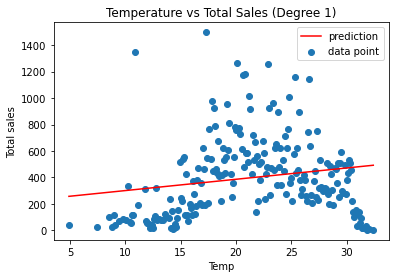

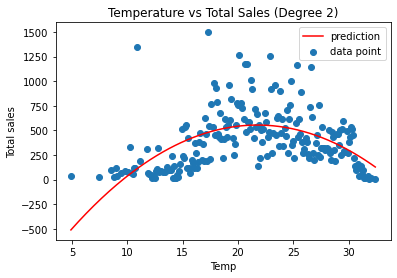

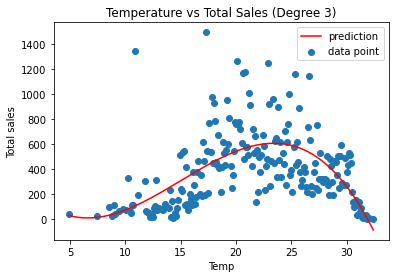

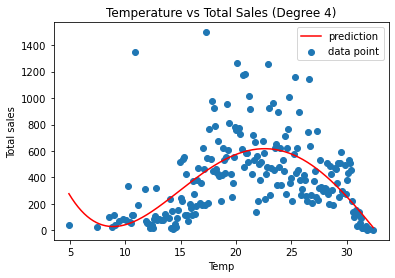

In [14]:
##TEMP AND TOTAL SALES
for i in range(1,5):
    graph(i,temp, title = 'Temperature vs Total Sales (Degree '+str(i)+')')

#### the data is interesting as the results are not as intutive as we thought...but in terms of the degrees we do believe 2nd fits the best 

### Using the 2nd degree we can plot the total sales monthly for each year AND View the Months with the lowest sales (using 'mins') (Amodh / Malhaar)

Degree- 2
weight [  25.42932068 -223.70354645  409.56818182]
R^2 Value 0.9291272722998682
Degree- 2
weight [  43.02622378 -454.33041958 1496.47727273]
R^2 Value 0.8074136902915011
Degree- 2
weight [  53.37412587 -587.32517483 1984.18181818]
R^2 Value 0.8632448942655275
Degree- 2
weight [  40.20804196 -585.90384615 2471.52272727]
R^2 Value 0.9137203026101418
Degree- 2
weight [  31.8981019  -400.96203796 1517.27272727]
R^2 Value 0.6252914421853994
Degree- 2
weight [  67.48401598 -684.9005994  2312.63636364]
R^2 Value 0.580966316449341
Degree- 2
weight [  77.17057942 -955.3538961  3170.97727273]
R^2 Value 0.7121840671359903
Degree- 2
weight [  48.89160839 -676.1993007  2546.36363636]
R^2 Value 0.6651704127888215


[[4.39853563676719],
 [5.27969200763886],
 [5.50196528005240],
 [7.28590373494500],
 [6.28504541183840],
 [5.07453942547538],
 [6.18988417138363],
 [6.91528999499392]]

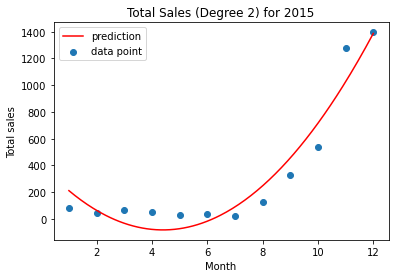

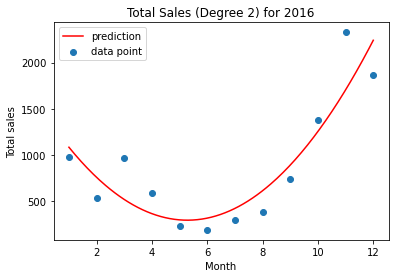

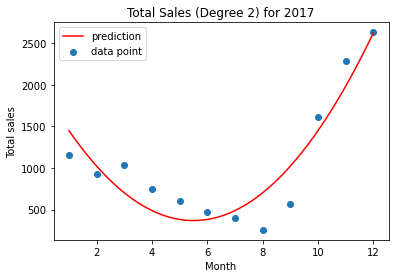

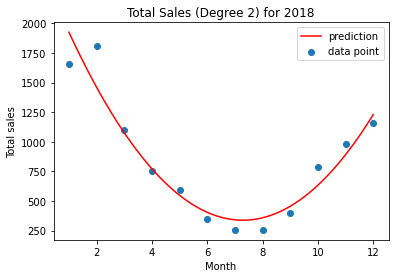

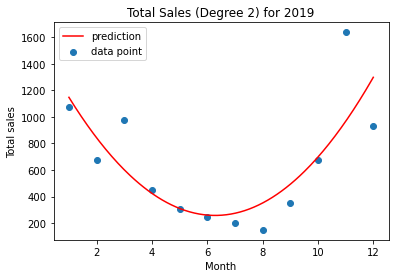

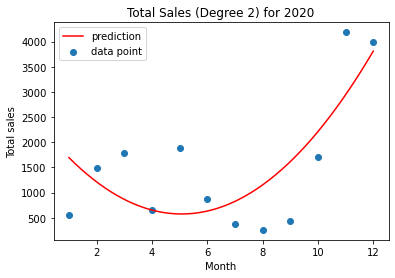

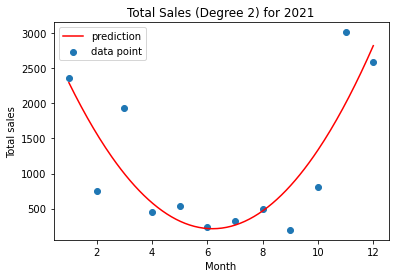

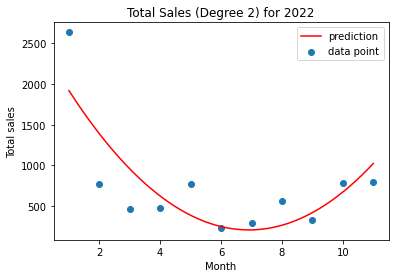

In [15]:
#YEARLY TOTAL SALES
mins=[]
for j in name:
    w,tp=graph(2,name[j], title = 'Total Sales (Degree 2) for '+j)
    mins.append(tp)
mins

#### It seems for most years the months of Summer seem to have the lowest sales (with most mins in or near May/June/July/August)

### We can go one step further and conduct our analysis on a categorial basis (Amodh)

2015
Degree- 2
weight [  13.05594406 -116.60839161  215.59090909]
R^2 Value 0.9457026626281714
2016
Degree- 2
weight [  25.31493506 -265.22352647  800.97727273]
R^2 Value 0.8608981490262118
2017
Degree- 2
weight [  33.97477522 -384.17207792 1153.06818182]
R^2 Value 0.9397022352769819
2018
Degree- 2
weight [  26.80544456 -382.83791209 1468.56818182]
R^2 Value 0.9437315013831652
2019
Degree- 2
weight [  16.88461538 -240.73776224  953.54545455]
R^2 Value 0.8724614021617195
2020
Degree- 2
weight [  6.30644356 -53.88236763 299.38636364]
R^2 Value 0.26778044628670383
2021
Degree- 2
weight [  5.45629371 -62.16608392 203.11363636]
R^2 Value 0.8251177947344958
2022
Degree- 2
weight [  3.28904429 -39.01398601 183.33333333]
R^2 Value 0.5379911524296048
2015
Degree- 2
weight [  5.11963037 -43.30694306  79.93181818]
R^2 Value 0.9136490197139722
2016
Degree- 2
weight [  6.98326673 -64.89785215 280.65909091]
R^2 Value 0.5948336079870638
2017
Degree- 2
weight [  5.83841159 -53.70704296 344.43181818]
R

<ipython-input-13-a922d906b871>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


2021
Degree- 2
weight [  7.15509491 -72.67707293 156.75      ]
R^2 Value 0.8682214251677465
2022
Degree- 2
weight [  4.05827506 -57.22657343 188.13333333]
R^2 Value 0.6816473579214679
2015
Degree- 2
weight [-0.03285997  0.8073646   1.18943197]
R^2 Value 0.28065779992794504
2016
Degree- 2
weight [ 0.125      -1.46287879 12.50909091]
R^2 Value 0.12205110313662937
2017
Degree- 2
weight [ 0.16433566 -0.64685315 14.63636364]
R^2 Value 0.2258052982381915
2018
Degree- 2
weight [-0.28546454  2.13411588 23.84090909]
R^2 Value 0.17776175398914407
2019
Degree- 2
weight [ 1.17382617e-02 -1.08616384e+00  2.53409091e+01]
R^2 Value 0.059980786503552874
2020
Degree- 2
weight [-0.40784216 10.99775225 -8.47727273]
R^2 Value 0.4151737293146618
2021
Degree- 2
weight [ 0.36913087 -2.74275724 25.        ]
R^2 Value 0.4024770656744723
2022
Degree- 2
weight [ 0.33216783 -3.15874126 28.76363636]
R^2 Value 0.09542859386657254
2015
Degree- 2
weight [ 0.37862138 -4.30969031 12.21678322]
R^2 Value 0.79264537115776

<ipython-input-16-b7e123147adf>:9: RankWarning: Polyfit may be poorly conditioned
  w,tp=graph(2,cat_yearly[i][j], title = 'Total Sales (Degree 2) for '+i + ' in '+j)


2017
Degree- 2
weight [ 0.09090909 -1.27272727  4.18181818]
R^2 Value 1.0
2018
Degree- 2
weight [ 0.14285714 -1.72857143  6.28571429]
R^2 Value 0.9166666666666667
2019
Degree- 2
weight [0.08333333 0.16666667 0.33333333]
R^2 Value nan
2020

<ipython-input-16-b7e123147adf>:9: RankWarning: Polyfit may be poorly conditioned
  w,tp=graph(2,cat_yearly[i][j], title = 'Total Sales (Degree 2) for '+i + ' in '+j)
<ipython-input-12-de8b8f7ffdc1>:10: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - RSS/TSS
<ipython-input-16-b7e123147adf>:9: RankWarning: Polyfit may be poorly conditioned
  w,tp=graph(2,cat_yearly[i][j], title = 'Total Sales (Degree 2) for '+i + ' in '+j)
<ipython-input-12-de8b8f7ffdc1>:10: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - RSS/TSS
<ipython-input-16-b7e123147adf>:9: RankWarning: Polyfit may be poorly conditioned
  w,tp=graph(2,cat_yearly[i][j], title = 'Total Sales (Degree 2) for '+i + ' in '+j)
<ipython-input-12-de8b8f7ffdc1>:10: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - RSS/TSS



Degree- 2
weight [0.33333333 0.33333333 0.33333333]
R^2 Value nan
2021
Degree- 2
weight [0.00275482 0.03030303 0.33333333]
R^2 Value nan
2022
2015
Degree- 2
weight [  3.87118392 -39.62980889  64.84611566]
R^2 Value 0.8754761265876805
2016
Degree- 2
weight [  2.71028971 -37.87012987 134.18181818]
R^2 Value 0.8677450700166406
2017
Degree- 2
weight [  2.43106893 -31.87662338  98.18181818]
R^2 Value 0.905738631065441
2018
Degree- 2
weight [  1.05392504 -17.38053984  63.17421028]
R^2 Value 0.8225800334968958
2019
Degree- 2
weight [ 0.05542357 -0.81537605  4.13711956]
R^2 Value 0.30605545732038564
2020
Degree- 2
weight [ 0.97902098 -7.92447552 78.61818182]
R^2 Value 0.04794121210251756
2021
Degree- 2
weight [  5.52472527 -62.25849151 181.34090909]
R^2 Value 0.8325964015987082
2022
Degree- 2
weight [  4.67379679 -64.81283422 209.20855615]
R^2 Value 0.7696884661228597
2015
Degree- 2
weight [-0.03571429  1.48571429 -6.95      ]
R^2 Value 0.472169811320755
2016
Degree- 2
weight [-0.00777202  0.

<ipython-input-16-b7e123147adf>:9: RankWarning: Polyfit may be poorly conditioned
  w,tp=graph(2,cat_yearly[i][j], title = 'Total Sales (Degree 2) for '+i + ' in '+j)


2020
Degree- 2
weight [ -2.06424146  26.93206276 -28.5760716 ]
R^2 Value 0.23843502064077082
2021
Degree- 2
weight [-0.21528472  4.66583417  3.5       ]
R^2 Value 0.1973411023769045
2022
Degree- 2
weight [ 0.32983683 -3.49440559 17.61212121]
R^2 Value 0.27103665781003594


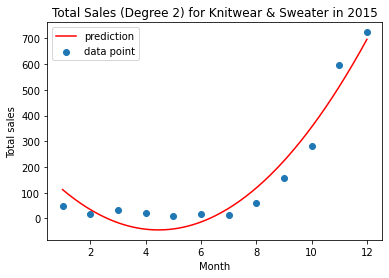

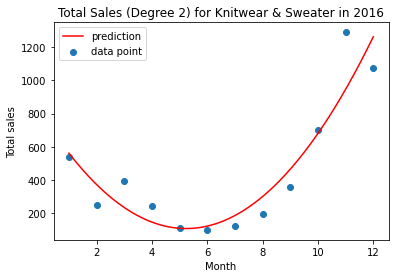

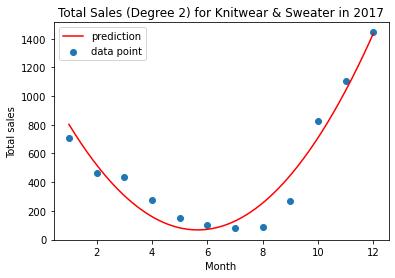

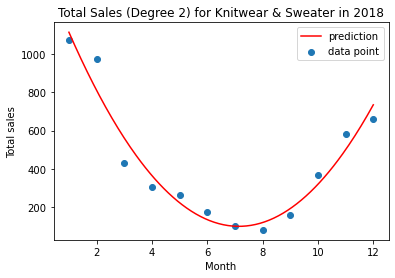

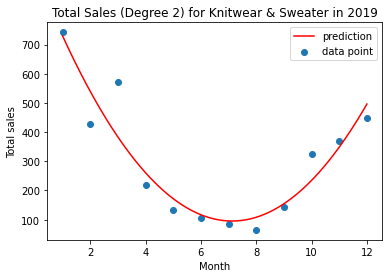

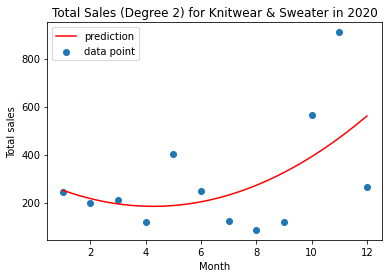

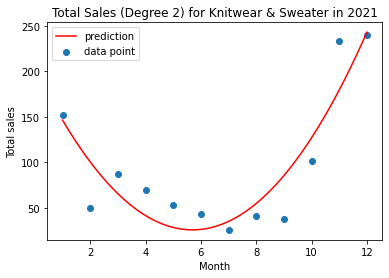

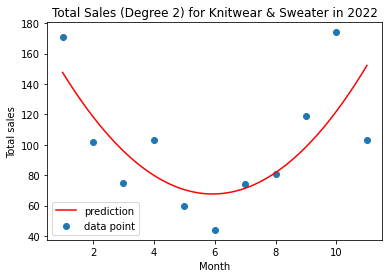

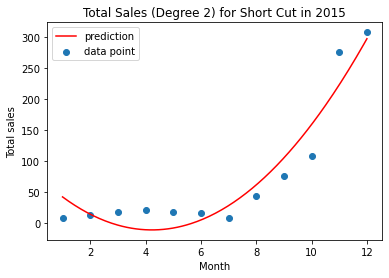

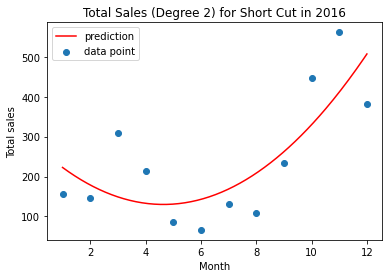

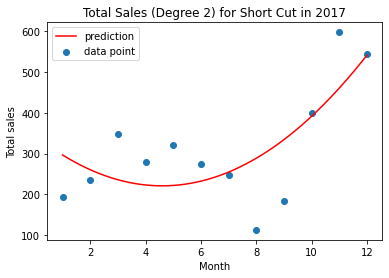

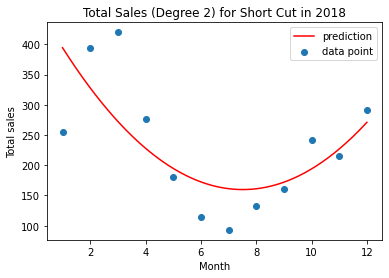

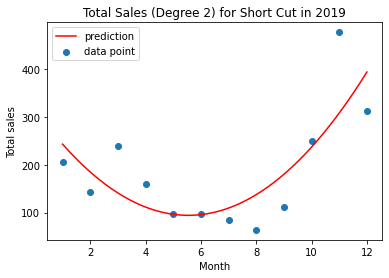

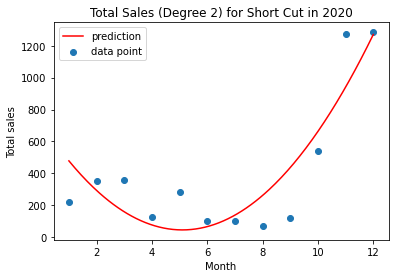

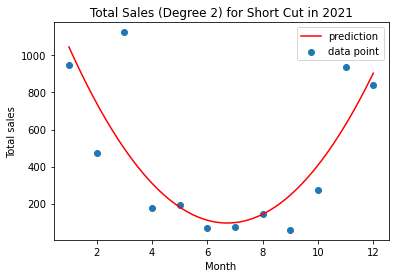

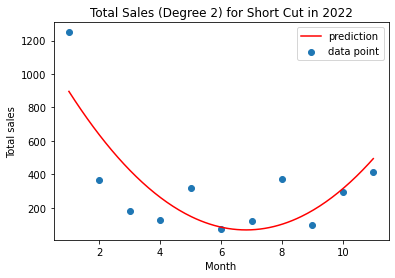

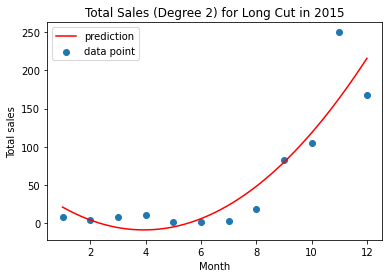

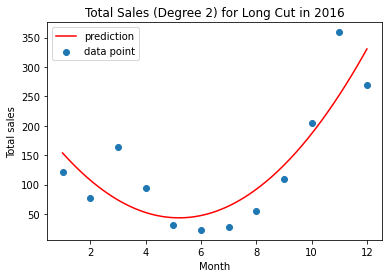

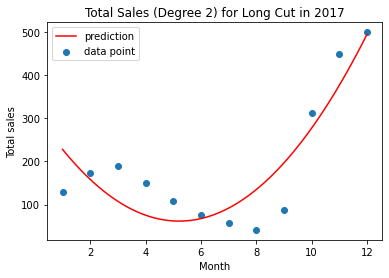

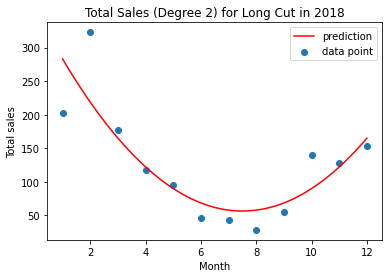

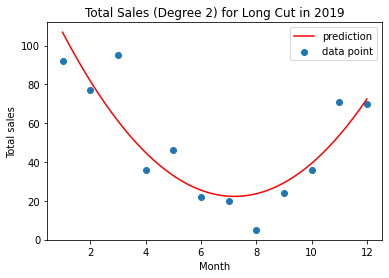

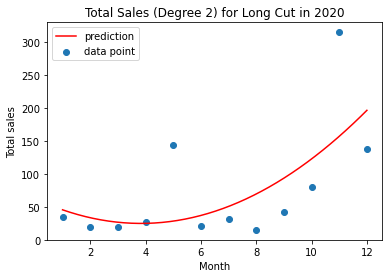

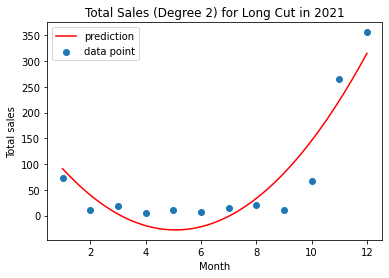

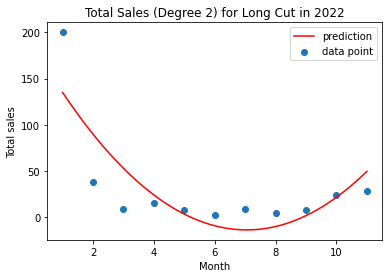

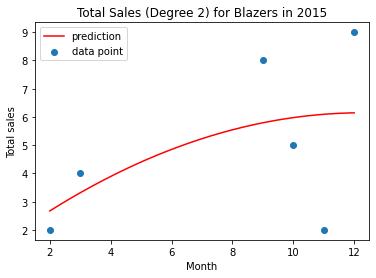

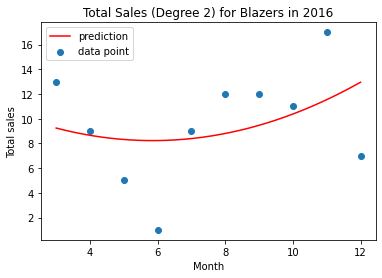

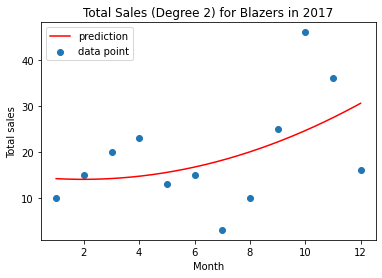

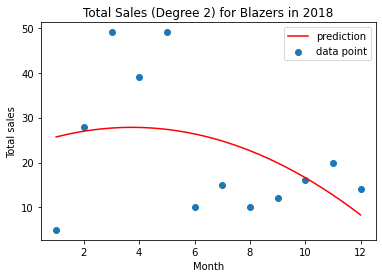

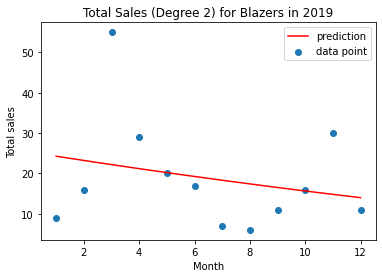

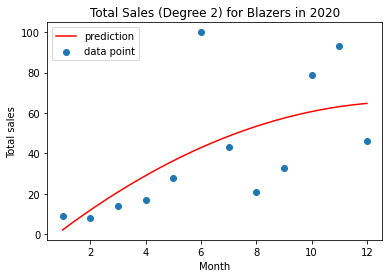

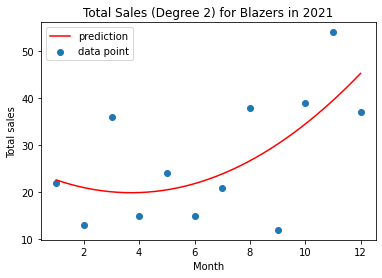

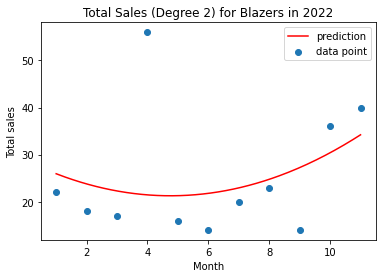

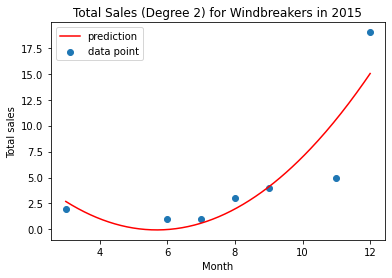

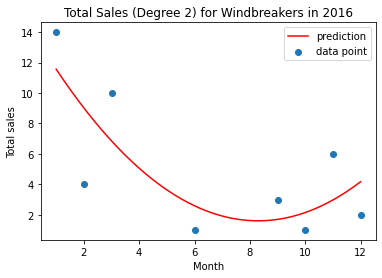

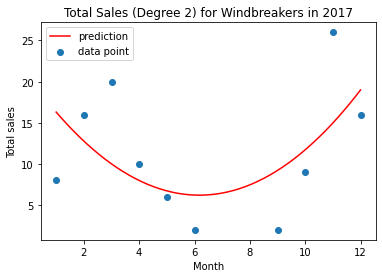

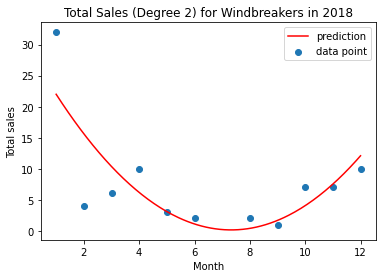

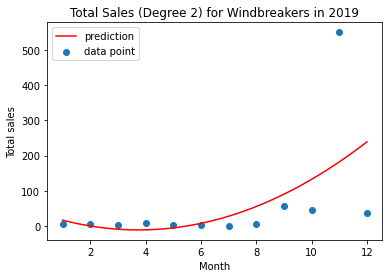

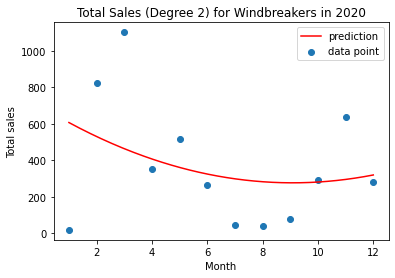

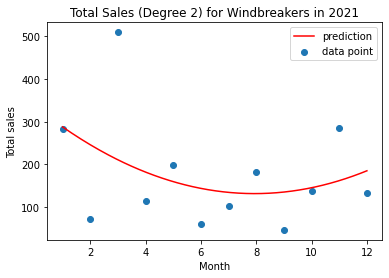

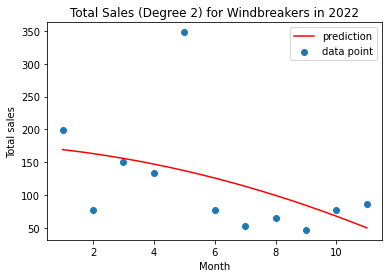

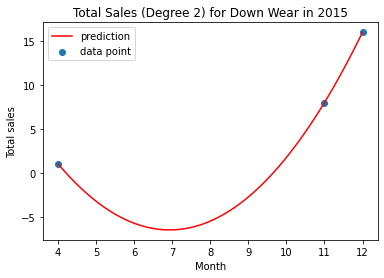

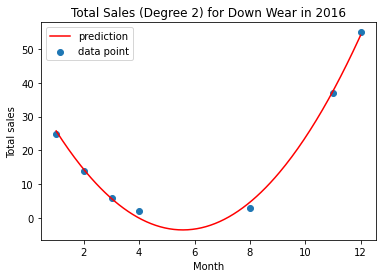

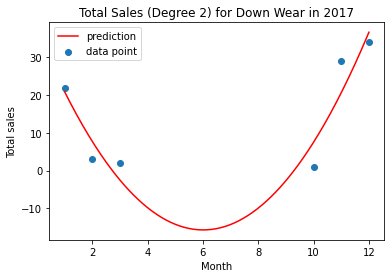

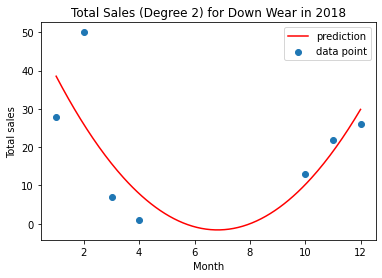

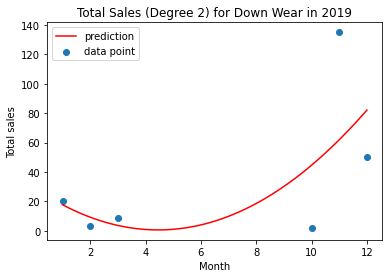

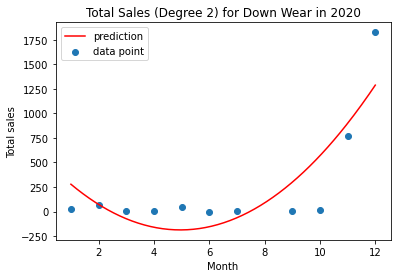

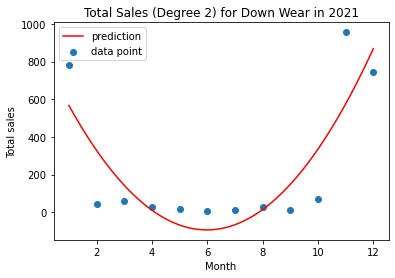

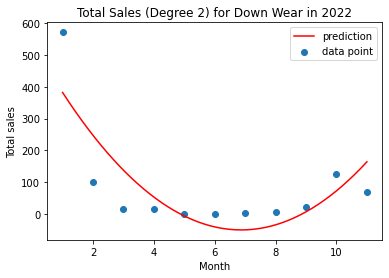

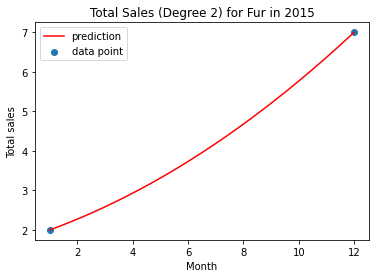

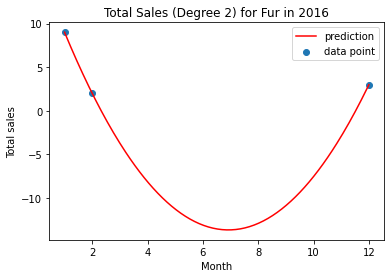

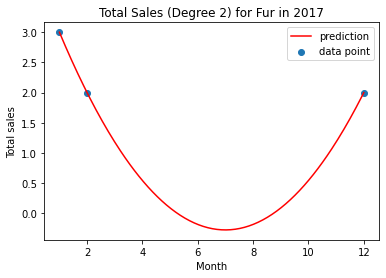

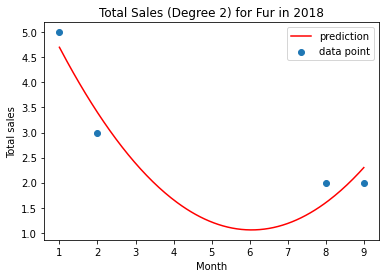

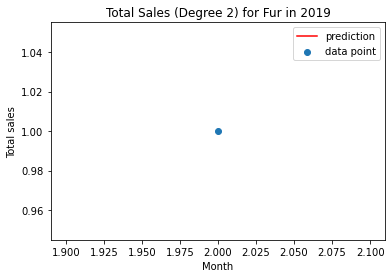

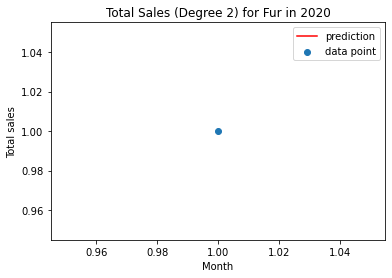

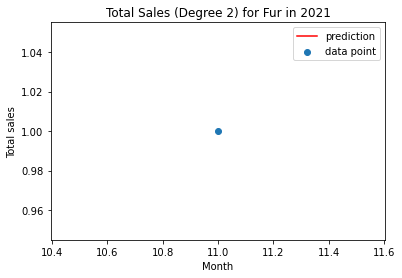

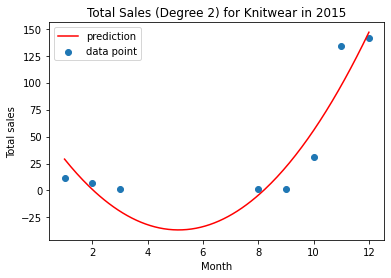

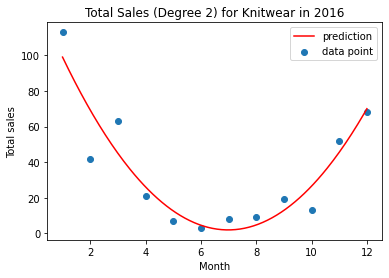

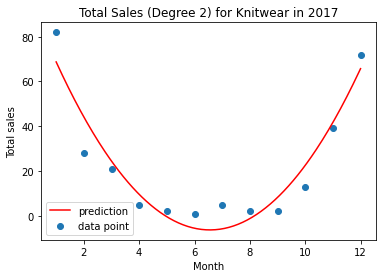

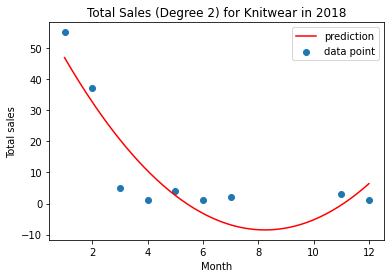

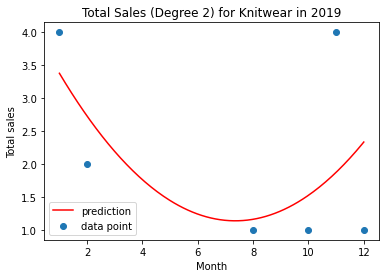

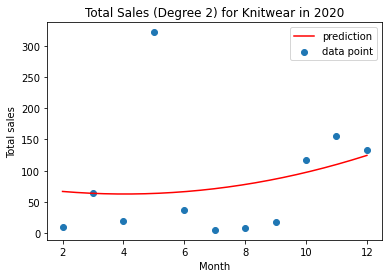

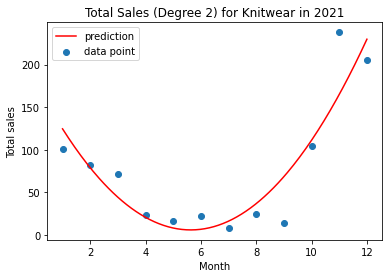

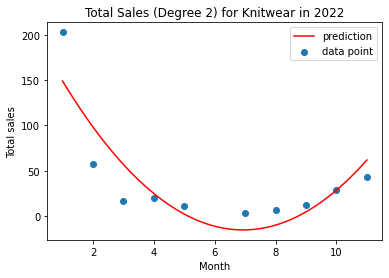

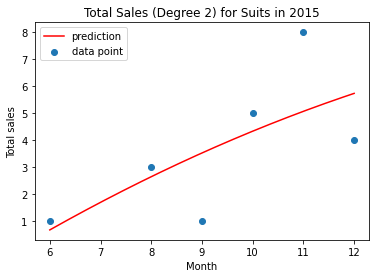

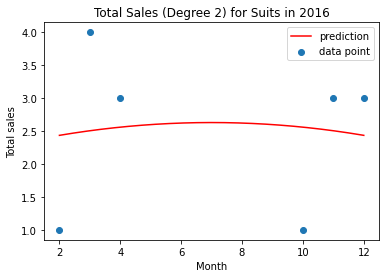

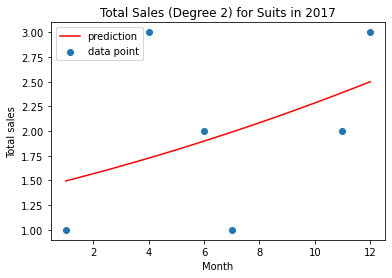

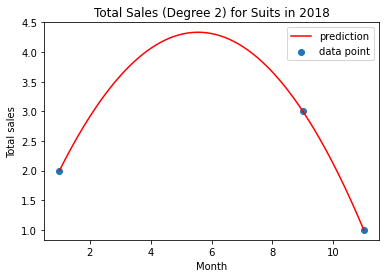

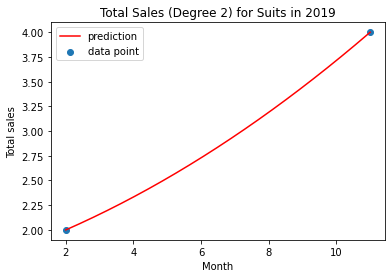

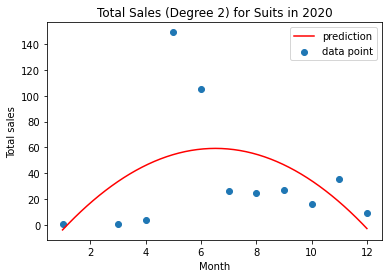

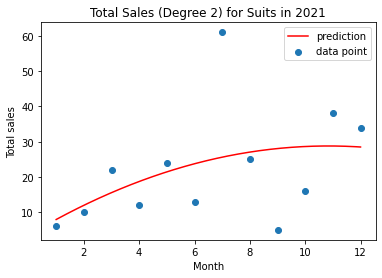

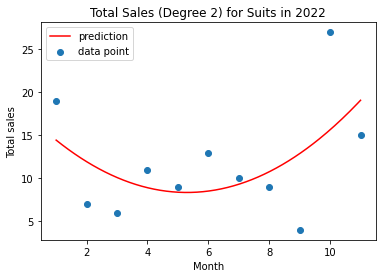

In [16]:
#EVERY CATEGORY YEARLY ANALYSIS
cat_mins={}

for i in categories:
    mins=[]
    for j in cat_yearly[i]:
        print(j)
        if cat_yearly[i][j].empty != 1:
            w,tp=graph(2,cat_yearly[i][j], title = 'Total Sales (Degree 2) for '+i + ' in '+j)
            mins.append(tp)
    cat_mins[i]=mins
    

In [17]:
cat_mins

{'Knitwear & Sweater': [[4.46572040707018],
  [5.23847929677094],
  [5.65378395265925],
  [7.14104761993497],
  [7.12890867674466],
  [4.27200902934539],
  [5.69673181672541],
  [5.93090007087172]],
 'Short Cut': [[4.22949899995124],
  [4.64666857408533],
  [4.59945673097489],
  [7.51436444123224],
  [5.54816761215326],
  [5.10108579738245],
  [6.72166114671599],
  [6.82286409387969]],
 'Long Cut': [[3.93971426509849],
  [5.20952858575725],
  [5.21004171870433],
  [7.50130165961605],
  [7.21340629274966],
  [3.83339802057053],
  [5.07869384620755],
  [7.05060310166570]],
 'Blazers': [[12.2849246231155],
  [5.85151515151512],
  [1.96808510638299],
  [3.73797025371828],
  [46.2659574468078],
  [13.4828536436007],
  [3.71515561569689],
  [4.75473684210526]],
 'Windbreakers': [[5.69129287598945],
  [8.29624890227072],
  [6.17550439730988],
  [7.32424444815493],
  [3.74511206485455],
  [9.08378591883087],
  [7.94082703286530],
  [-3.13714285714287]],
 'Down Wear': [[6.92857142857143],
  [5.

In [27]:
sumz=0

for j in cat_mins:
    sumz=0
    print(j)
    for i in cat_mins[j]:
        sumz=sumz+i[0]
    print(sumz/len(cat_mins[j]))
    

Knitwear & Sweater
5.69094760876532
Short Cut
5.64797092454689
Long Cut
5.62958593629619
Blazers
11.5076498353678
Windbreakers
5.63998409789160
Down Wear
5.95255826272183
Fur
0.978451021087156
Knitwear
6.35972713944343
Suits
3.66110622960533


#### It is interesting to see that not all products have the same trend!

## Conclusion & Results

As seen in the regression charts, our hypothesis was somewhat inaccurate. According to the data given by HKTV mall and the Hong Kong Observatory there is a steady trend of increased sales of winter clothing when the weather is usually around 20-25 degrees C. During the months of October, November and December [before the weather gets cooler]. We also saw a steady trend of having the least number of sales during the months of May, June, and July. 

With this information we recommend HKTV mall to release their winter clothing before the cooler months start so around October ,since that is when the weather starts dropping to 25 degrees. HKTV mall should also discount their winter clothing during the months of summer (May and June) so they could have steady sales throughout the year. With discounted winter attire, people in Hong Kong would have more incentive of buying the clothing since they could be thinking of buying the winter clothes while its on sale for the upcoming winter instead of buying it at full price.

## Who did what?:
Malhaar - the notebook structure + markdown commenting, HTKV Mall API DATA Gathering and understanding (the hktvmall_data_collection file), edits and fixes to code structure 
<br>
Amodh - Helped with obtaining the permission for HTKV Mall Data, major Regression Analysis and Visualizations, HKO Data gathering code,
<br>
Cristal - Video Editing and Structure, Introduction and Conclusion type ups, coming up with hypothesis and quick data understanding using Excel spreadsheets.